In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')

In [8]:
train_data = pd.read_json("./inputs/train.json").set_index('id')

Data Visualization

Mainly getting some practice with pandas and data visualization

Borrowed ideas from https://www.kaggle.com/gloriahristova/a-walkthrough-eda-vizualizations-unigram-model

In [124]:
def cuisine_distribution(recipes):
    cuisine_counts = recipes.cuisine.value_counts()
    num_recipes = np.sum(cuisine_counts)
    return cuisine_counts/num_recipes * 100

In [113]:
num_cuisines = len(train_data.cuisine.unique())
cuisine_dist = cuisine_distribution(train_data)

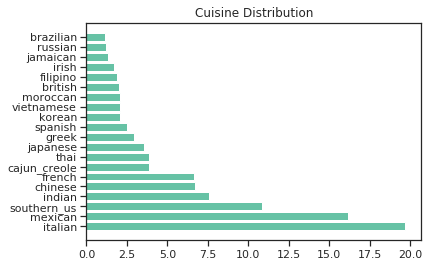

In [144]:
x_pos = np.arange(num_cuisines)
plt.barh(x_pos, cuisine_dist)
plt.yticks(x_pos, cuisine_dist.index)
plt.title("Cuisine Distribution")
plt.show()

In [154]:
ingr = train_data['ingredients']
x = ingr.str.len()

In [155]:
print("Maximum number of ingredients in a recipe: " + str(ingr.str.len().max()))
print("Minimum number of ingredients in a recipe: " + str(ingr.str.len().min()))

Maximum number of ingredients in a recipe: 65
Minimum number of ingredients in a recipe: 1


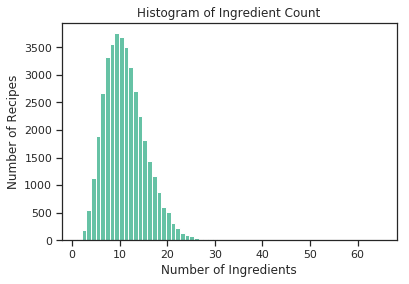

In [156]:
plt.hist(x, bins= 65)
plt.xlabel("Number of Ingredients")
plt.ylabel("Number of Recipes")
plt.title("Histogram of Ingredient Count")
plt.show()

In [189]:
def cuisine_ingr_dist(recipes):
    cuisines = recipes.cuisine.unique()
    lst = []
    #create data frame showing cuisine and ingredient numbers
    for i in cuisines:
        cuisine_df = recipes.loc[recipes['cuisine'] == i]
        lst.append( [cuisine_df.ingredients.str.len().tolist()] )
    
    return pd.DataFrame(lst, index=cuisines, columns=['ingredient counts'])

In [190]:
ingr_dist = cuisine_ingr_dist(train_data)

Text(0.5, 1.0, 'Ingredient Count Distribution vs Cuisine')

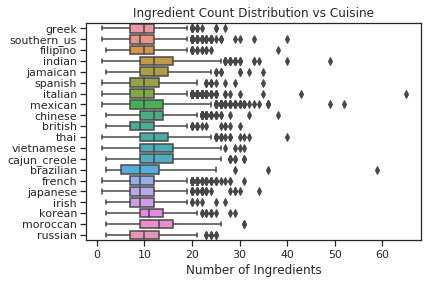

In [224]:
sns.boxplot(orient= 'h', data = ingr_dist['ingredient counts'])
plt.xlabel("Number of Ingredients")
plt.yticks(x_pos, ingr_dist.index)
plt.title("Ingredient Count Distribution vs Cuisine")

In [11]:
y_cuisine = train_data.cuisine

In [45]:
for a in train_data.loc[y_cuisine == 'thai']:
    print(a.ingredients)

AttributeError: 'str' object has no attribute 'ingredients'

In [78]:
index = train_data.cuisine.value_counts().index